In [25]:
#import libraries
import numpy as np                # linear algebra
import pandas as pd               # data processing, read CSV file   
import seaborn as sns             # data visualization
import matplotlib.pyplot as plt   # calculate plots
import missingno as msno          # calculate missing value          
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

init_notebook_mode(connected=True)

In [4]:
#data loading
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape

(7043, 21)

In [5]:
#displaying column names
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
#info about data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#info of data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


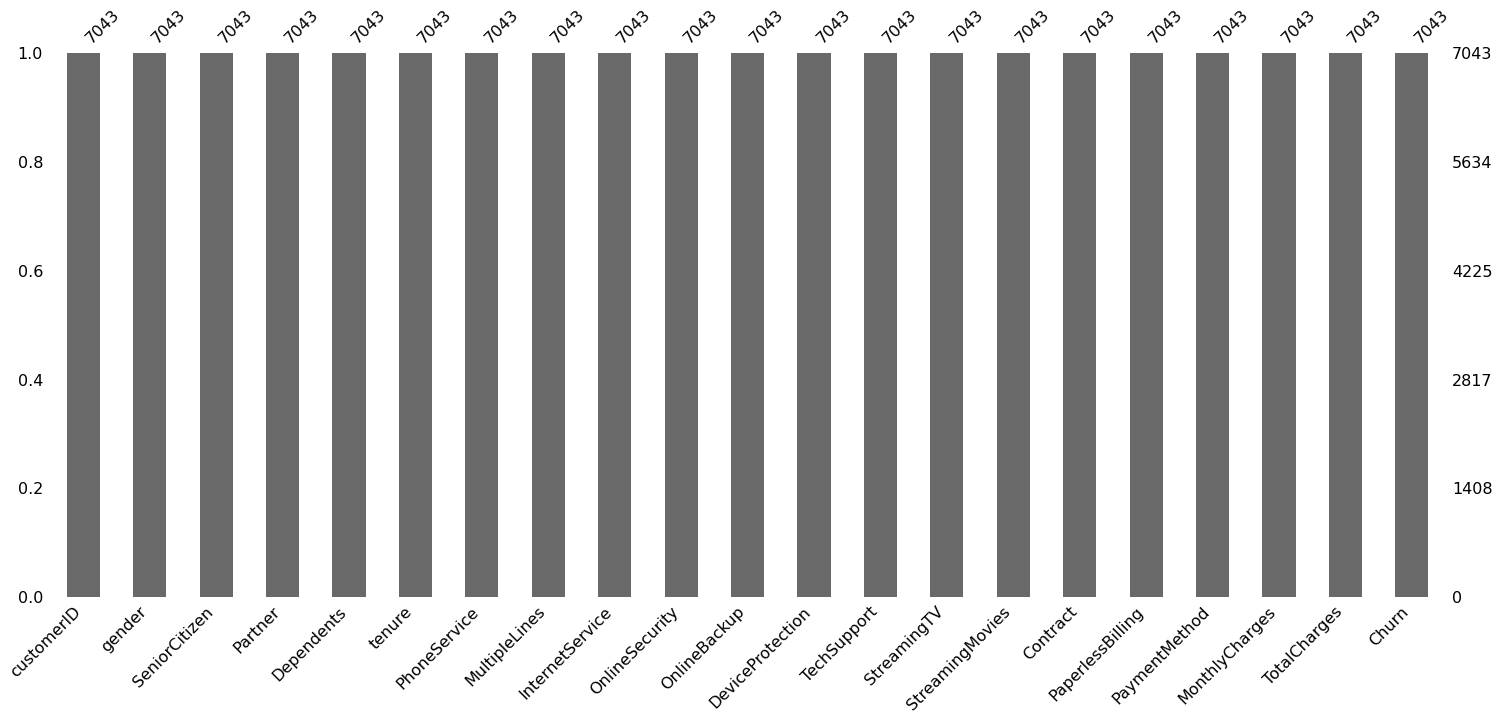

In [13]:
#identifying missing values by a bar
msno.bar(df)
plt.show()


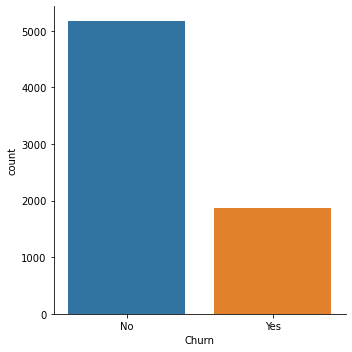

In [18]:
#churn and non-churn Customers proportion
df['Churn'].value_counts()
sns.catplot(data=df, x="Churn", kind="count");

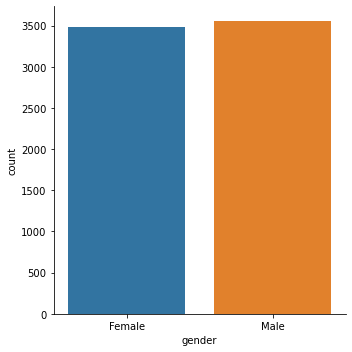

In [16]:
#distribution of gender
sns.catplot(data=df, x="gender", kind="count");

In [8]:
#creating separate dataset
#Churn yes dataset
churn_yes = pd.DataFrame(df.query('Churn == "Yes"'))
#Churn no dataset
churn_no = pd.DataFrame(df.query('Churn == "No"'))

Text(0.5, 1.0, 'SeniorCitizen')

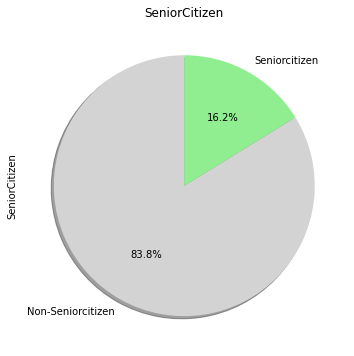

In [9]:
#percentage of senior citizens in each of these dataframes
df['SeniorCitizen'].value_counts().plot(kind='pie',
                                        figsize=(8,6),
                                        colors = ['lightgrey', 'lightgreen'],
                                        autopct='%1.1f%%',
                                        shadow = True,
                                        startangle=90,
                                        labels=["Non-Seniorcitizen", "Seniorcitizen"])
plt.title("SeniorCitizen")

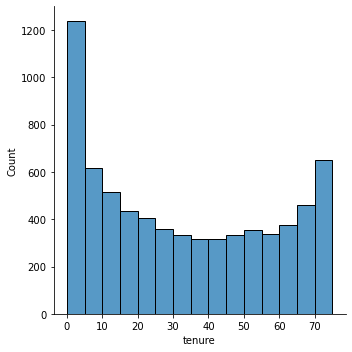

In [95]:
#distribution of Tenure
sns.displot(df, x="tenure", binwidth=5);

In [104]:
#distribution of Internet Service
InternetService=pd.DataFrame(churn_yes['InternetService'].value_counts().reset_index())
InternetService.rename(columns={'index':'InternetService_churn_yes','InternetService':'counts_yes'},inplace=True)
InternetService_no=pd.DataFrame(churn_no['InternetService'].value_counts().reset_index())
InternetService_no.rename(columns={'index':'InternetServicechurn_no','InternetService':'counts_no'},inplace=True)
InternetService_status=pd.concat([InternetService,InternetService_no],axis=1)
InternetService_status

,InternetService_churn_yes,counts_yes,InternetServicechurn_no,counts_no
0,Fiber optic,1297,DSL,1962
1,DSL,459,Fiber optic,1799
2,No,113,No,1413


In [11]:
#distribution of Internet Service
fig= go.Figure()
#Churn_yes
fig.add_trace(go.Bar(name='Churn Yes',
                     x=['Fiber optic','DSL','No'],
                     y=[1297,459,113],
                     marker_color='grey'))#Churn_no
fig.add_trace(go.Bar(name='Churn No', 
                     x=['Fiber optic','DSL','No'], 
                     y=[1799,1962,1413], 
                     marker_color='lightblue'))
fig.update_layout(title='InternetService',
                     autosize=False,
                     width=500,
                     height=500)
fig.update_xaxes(title='Different Internet Services')
fig.update_yaxes(title='Counts')
fig.show()

In [14]:
#examination the various contracts in which the customers were enrolled for churn yes and churn no
# Creating the figure
fig = go.Figure()

# Churn Yes
fig.add_trace(go.Bar(name='Churn Yes',
                     x=['Month-to-month', 'Two year', 'One year'],
                     y=[3875, 1695, 1473],
                     marker_color='blue'))

# Churn No
fig.add_trace(go.Bar(name='Churn No',
                     x=['Month-to-month', 'Two year', 'One year'],
                     y=[2220, 1647, 1307],
                     marker_color='lightblue'))

# Updating the layout
fig.update_layout(title='Contract',
                  autosize=False,
                  width=500,
                  height=500)

# Updating the axes
fig.update_xaxes(title='Different Contract')
fig.update_yaxes(title='Counts')

# Displaying the figure
fig.show()

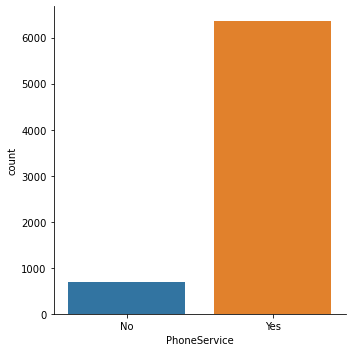

In [121]:
#distribution of PhoneService
sns.catplot(data=df, x="PhoneService", kind="count");

In [13]:
#examination the PhoneService in which the customers were enrolled for churn yes and churn no
color = {"Yes": 'blue', "No": 'green'}
fig = px.histogram(df, x="Churn", 
                       color="PhoneService", 
                       barmode="group", 
                       color_discrete_map=color)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.update_layout(title='Chrun distribuiton with Phone Service')
fig.show()

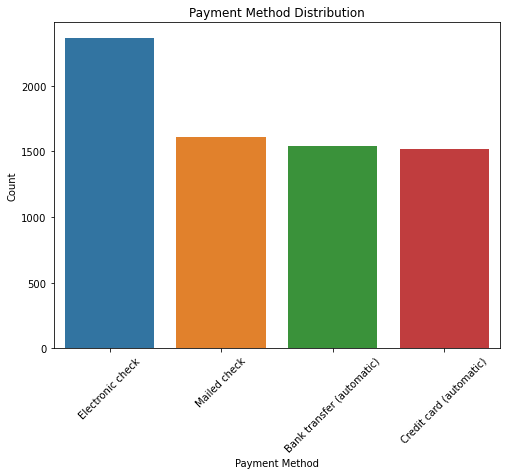

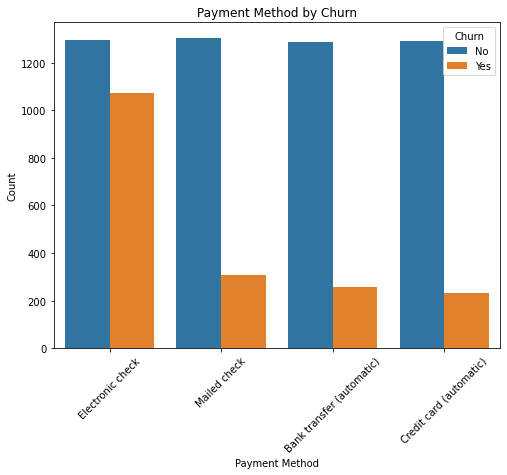

In [16]:
# Payment method distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PaymentMethod')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Payment method and churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Payment Method by Churn')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

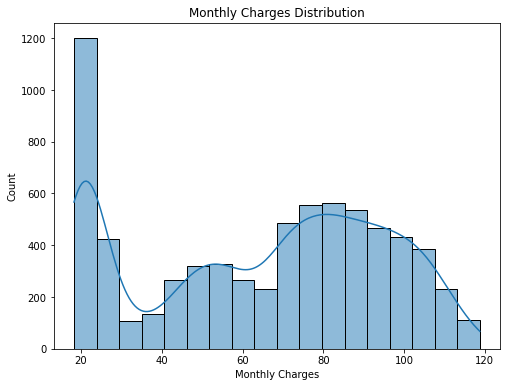

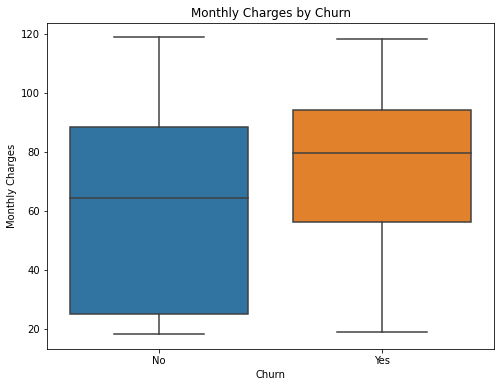

In [17]:
# Monthly charges distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='MonthlyCharges', kde=True)
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

# Average monthly charges for churned vs. non-churned customers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

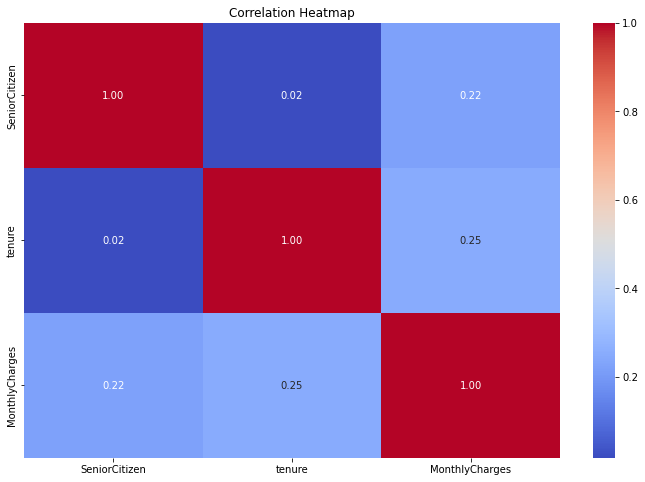

In [18]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

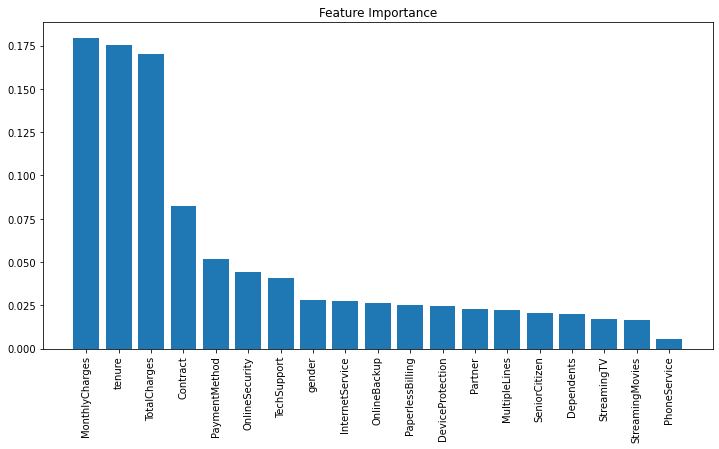

In [22]:
# Encode categorical variables
df_encoded = df.copy()
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = LabelEncoder().fit_transform(df_encoded[column])

# Train a Random Forest model
X = df_encoded.drop(columns=['Churn', 'customerID'])
y = df_encoded['Churn']
model = RandomForestClassifier()
model.fit(X, y)

# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()

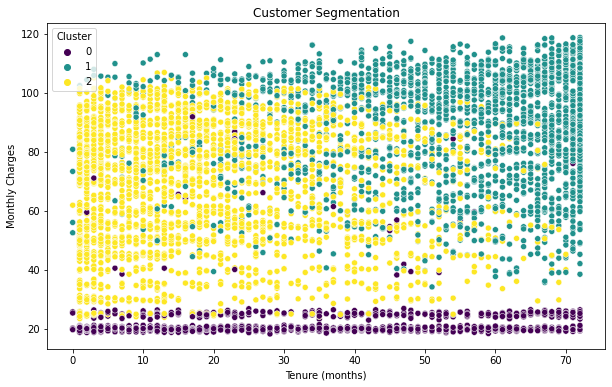

In [27]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Cluster', palette='viridis', legend='full')
plt.title('Customer Segmentation')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges')
plt.legend(title='Cluster')
plt.show()

In [125]:
#source of data: 
#https://www.kaggle.com/code/bhartiprasad17/customer-churn-prediction/data